# Clase teórica 6

En esta clase vamos a ver:
- Cálculo numérico en Numpy
- Aprendizaje automático
- Aprendizaje profundo

## Cálculo numérico en `NumPy`
En esta sección, vamos a usar la librería `NumPy`. Para instalarla, ejecutar en la consola 
- `conda install -c anaconda numpy`, o
- `pip install numpy`,

aunque ya debería estar instalada ya que es una dependencia de `Pandas` (es decir, cuando instalaron `Pandas` se instaló también `NumPy` porque `Pandas` depende de `NumPy`).

Una vez instalada, la importamos:

In [ ]:
import numpy as np
print("Tenemos instalada la versión {} de NumPy.".format(np.__version__))

Ejecutemos la siguiente instrucción para que cuando hagamos `print` los números aparezcan con sólo 3 decimales y sean más fáciles de leer:

In [ ]:
np.set_printoptions(precision=3)

### Arrays multidimensionales: la clase `ndarray`
NumPy implementa una clase llamada `ndarray` (por array _n_-dimensional).

#### Vectores, matrices y tensores

Definimos un **vector**:

In [ ]:
vector = np.array((1.,2,3,4))

In [ ]:
print(vector)

In [ ]:
vector.dtype

In [ ]:
print("vector ndim: ", vector.ndim)
print("vector shape:", vector.shape)
print("vector size: ", vector.size)

Definimos una **matriz** (tensor de rango 2):

In [ ]:
matriz = np.array([[1,2,3], [4,5,6]])
print(matriz)

In [ ]:
print("matriz ndim: ", matriz.ndim)
print("matriz shape:", matriz.shape)
print("matriz size: ", matriz.size)

Definamos un **tensor de rango 3**:

In [ ]:
tensor3 = np.array([[[-1,-2], [-3,-4]], [[0,0], [0,0]], [[2,1], [1,5]]])

In [ ]:
print("tensor3 ndim: ", tensor3.ndim)
print("tensor3 shape:", tensor3.shape)
print("tensor3 size: ", tensor3.size)

In [ ]:
print(tensor3)

#### Otras formas de inicializar arrays

Definamos un tensor de todos ceros:

In [ ]:
todos_ceros = np.zeros((2,3))
print(todos_ceros)

Definamos un tensor de todos unos:

In [ ]:
todos_unos = np.ones((2,2,3))
print(todos_unos)

Definamos un tensor inicialmente vacío...

In [ ]:
tensor_por_filas = np.empty((4,5))
print(tensor_por_filas) 

...y luego usemos un ciclo for para llenar las filas una a una:

In [ ]:
for i in range(tensor_por_filas.shape[0]):
    tensor_por_filas[i] = i # equivalente a tensor[i,:]
    
print(tensor_por_filas)

Podemos hacer algo similar para las columnas:  

In [ ]:
tensor_por_columnas = np.empty((4,3))
for i in range(tensor_por_columnas.shape[1]):
    tensor_por_columnas[:,i] = i # acá el : es necesario
    
print(tensor_por_columnas)

Definamos un **tensor aleatorio** (más acerca de esto más adelante):

In [ ]:
a = np.random.rand(2,3)
b = np.random.rand(3,2)

In [ ]:
print(a, "\n\n", b)

### Operaciones con arrays

#### Aritmética de arrays

In [ ]:
a + b

In [ ]:
a - b

In [ ]:
a * b

In [ ]:
a / b

In [ ]:
a ** b

In [ ]:
a > 0.5

In [ ]:
2 * a + 3

#### Indexado

Indexado básico: extraer elementos individuales:

In [ ]:
a[0][0]

Indexado con booleanos (como en Pandas):

In [ ]:
print(a)
a[a > 0.5]

Indexado con _slices_ (rebanadas):

In [ ]:
a[:,1:3]

_Fancy indexing_ :

In [ ]:
a[:,[0,2]]

### El submódulo `linalg` para álgebra lineal

In [ ]:
# Esto no es necesario porque ya importamos todo numpy antes
# Pero es lo que tendríamos que correr para importar ese submódulo en particular.
# import numpy.linalg

In [ ]:
c = a.dot(b)

In [ ]:
np.linalg.inv(c).dot(c)

In [ ]:
np.linalg.eigvals(c)

In [ ]:
np.linalg.eigvals(np.linalg.inv(c))

In [ ]:
from numpy.linalg import inv

In [ ]:
inv(c).dot(c)

### Números aleatorios: submódulo `random`

In [1]:
import numpy.random # ídem linalg
import matplotlib.pyplot as plt

In [ ]:
import random

In [ ]:
np.random.rand(2,3,4)

In [ ]:
plt.hist(np.random.randn(1000000)*3+2, 1000)
plt.show()

## Aprendizaje automático

En esta sección vamos a usar la librería `scikit-learn`.
Para instalarla, basta ejecutar `conda install scikit-learn ` en la consola.

`Scikit-learn` provee una serie de funcionalidades útiles para entrenar algoritmos de aprendizaje automático.

In [2]:
import sklearn

### Aprendizaje supervisado

#### Regresión lineal

In [ ]:
import numpy as np
from sklearn import linear_model

In [ ]:
N = 1000 # Número de observaciones
M = 3 # Número de predictores (features)
beta = np.random.randn(M,1) * 2 # Efecto de cada predictor en la variable "respuesta" (Y)

In [ ]:
print(beta)

Simulemos los "datos", $X$, y los efectos $\beta$ de cada predictor en la respuesta :

In [ ]:
X = 2 *(np.random.random((N,M)) - 0.5) # los "datos" (uniforme en [-1,1])
print("Datos (primeras 5 filas):\n", X[:5],"\n...\n")
print("Efectos:\n",beta)

In [ ]:
plt.hist(X)
plt.show()

Ahora simulemos las respuestas (o "etiquetas") $y=X\beta+\epsilon$, donde $\epsilon\sim \mathcal{N}(0,\sigma^2)$
Primero, chequeemos las dimensiones:

In [ ]:
y = X.dot(beta)
print(X.shape, "*", beta.shape, " = ", y.shape)

In [ ]:
sigma = 1
ruido = np.random.randn(N,1) * sigma
y = y + ruido
print("Efectos:\n",beta)

Grafiquemos los datos (marginalizando respecto a todos los predictores salvo uno)

In [ ]:
plt.scatter(X[:,2], y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=250)

In [ ]:
print("Tamaño del dataset de entrenamiento:", X_train.shape[0])
print("Tamaño del dataset de testeo:", X_test.shape[0])

In [ ]:
modelo = linear_model.LinearRegression()

In [ ]:
modelo = modelo.fit(X_train, y_train)

In [ ]:
print("Coeficientes reales:\t ", beta[:,0])
print("Coeficientes estimados:\t ", modelo.coef_[0])

Evaluemos el modelo en la partición de testeo:

In [ ]:
y_pred = modelo.predict(X_test)
print(y_pred)

In [ ]:
modelo.score(X_train, y_train)

### Aprendizaje no supervisado
Como vimos, en aprendizaje no supervisado no tenemos "etiquetas", sino que tratamos de descubrir patrones en los datos.

#### Clustering
Vamos a ver un ejemplo de un algoritmo de clustering: $k$-medias ($k$-means en inglés).

Primero simulemos algunos datos con una estructura de clusters subyacente. Esto lo hacemos utilizando una función de scikit-learn llamada `make_blobs`:

In [13]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, random_state=0)

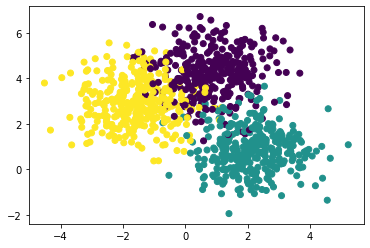

In [14]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [15]:
print(y)

[2 0 2 2 2 1 0 0 1 0 1 2 2 0 0 1 2 1 0 0 2 1 2 0 0 0 0 0 1 1 2 2 2 0 2 1 1
 2 1 1 1 1 0 1 1 1 1 2 0 1 0 0 1 0 0 1 1 2 2 1 2 2 2 2 0 0 1 1 2 2 0 0 0 2
 0 2 1 0 2 2 2 0 0 0 0 0 0 1 0 1 0 1 1 2 1 2 0 1 0 2 0 2 2 1 0 0 2 0 1 1 0
 0 0 0 2 2 0 2 0 1 0 1 2 0 0 1 2 2 2 0 0 2 0 0 2 0 0 1 2 2 0 0 0 2 2 2 0 0
 2 0 0 2 0 0 0 2 0 1 1 2 0 0 0 0 0 0 2 0 1 1 1 2 2 2 2 0 1 0 0 2 0 0 0 1 1
 0 2 1 2 0 1 2 1 2 2 0 0 2 1 1 0 2 1 0 0 2 2 2 1 0 2 0 0 0 1 2 0 2 0 0 2 0
 2 2 0 1 0 0 0 2 2 1 2 1 0 1 0 1 2 2 2 2 2 2 0 2 2 0 1 1 1 1 2 2 1 0 1 0 2
 1 0 1 1 1 0 1 2 2 2 0 2 1 2 2 2 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 0 2 1 1 1 0
 0 1 0 1 1 1 1 2 0 0 1 0 0 0 2 0 2 0 2 1 0 1 0 1 0 1 2 0 1 2 1 2 0 1 1 2 2
 2 0 2 0 2 0 1 0 1 1 2 1 1 0 1 0 1 0 0 2 2 1 2 0 0 0 0 1 2 1 1 2 2 0 2 0 1
 1 1 1 0 2 1 2 0 2 2 0 2 2 1 1 2 2 1 2 1 2 2 1 0 0 2 1 2 1 1 1 0 0 0 1 2 0
 1 1 2 0 0 2 0 2 0 1 1 1 2 0 2 1 0 0 1 2 1 1 2 0 2 0 2 2 1 2 2 1 1 0 1 0 0
 0 2 1 0 1 2 2 1 0 1 0 0 1 0 2 1 2 2 2 1 0 2 0 0 0 0 0 0 1 0 1 0 0 0 2 2 1
 2 2 2 1 1 1 1 2 0 1 0 2 

In [16]:
from sklearn import cluster
clustering = cluster.KMeans(n_clusters=3)

In [17]:
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
# etiquetas de los clusters encontrados
print(clustering.labels_)

[2 2 2 0 0 0 1 0 1 1 0 2 0 0 0 1 1 1 0 0 0 2 1 0 2 2 0 0 1 0 1 2 2 1 1 0 1
 1 1 1 2 0 0 2 1 2 1 1 2 2 1 1 0 0 1 2 2 0 1 0 2 1 0 1 1 2 1 0 1 1 0 2 2 0
 2 2 1 2 0 1 1 1 2 1 1 0 0 0 2 1 0 0 1 1 2 0 1 2 2 2 1 2 0 2 0 1 1 1 0 0 0
 2 2 2 2 0 1 2 2 1 0 1 1 2 0 2 1 0 0 1 1 1 0 1 1 1 1 1 0 2 1 0 0 1 1 2 1 1
 2 2 1 0 2 2 0 0 1 1 2 0 0 1 2 1 2 0 2 2 2 0 0 2 0 1 1 1 1 1 0 1 2 2 2 2 2
 1 1 0 0 0 1 1 2 2 2 1 2 2 1 0 2 2 2 2 1 1 0 2 0 1 2 1 1 2 0 2 1 1 0 2 2 0
 0 2 2 1 1 0 1 2 0 0 0 2 0 2 2 0 1 2 2 2 0 0 2 2 0 1 0 1 0 0 2 0 0 0 0 2 0
 0 2 1 2 0 0 1 2 2 1 0 1 0 2 0 0 2 2 1 0 1 0 2 2 0 0 1 0 0 2 0 0 2 0 2 0 2
 0 0 1 2 0 0 2 2 2 1 0 1 1 0 1 0 0 1 1 0 2 1 2 2 0 1 0 2 2 0 2 2 1 1 1 1 1
 1 1 1 1 0 0 0 1 1 0 0 2 0 2 2 1 1 0 1 1 2 1 0 0 0 0 2 0 2 0 0 2 2 2 0 0 1
 0 0 2 0 0 1 2 1 1 2 1 2 1 0 0 0 0 2 1 0 2 1 0 0 1 2 0 1 2 0 2 2 2 2 0 1 2
 0 2 2 2 1 1 1 2 0 0 2 0 1 0 0 2 0 2 2 2 2 1 2 0 1 2 2 1 0 2 1 2 1 1 2 1 0
 2 1 0 2 2 0 0 2 1 1 0 0 0 1 0 0 0 0 2 2 2 1 0 1 1 2 1 0 0 2 1 2 0 1 1 2 2
 2 2 2 0 1 0 1 0 1 2 0 1 

In [18]:
print(
  sklearn.metrics.confusion_matrix(y_pred=clustering.labels_, y_true=y)
)

[[ 29  12 293]
 [  2 316  15]
 [309   5  19]]
